In [167]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.neighbors import NearestNeighbors
from imblearn.over_sampling import RandomOverSampler

In [168]:
df = pd.read_csv('drugLibTrain_raw.csv')

In [169]:
df

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


In [170]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [171]:
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


# Preprocessing

In [172]:
df = df.rename(columns={'urlDrugName':'DrugName','commentsReview':'comments'})

In [173]:
df.isnull().sum()

DrugName              0
rating                0
effectiveness         0
sideEffects           0
condition             1
benefitsReview       18
sideEffectsReview    75
comments             12
dtype: int64

In [174]:
df.dropna(axis=0,inplace=True)
df

,DrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,comments
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
3102,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


In [175]:
df.drop_duplicates(inplace=True)
df

,DrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,comments
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
3102,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


# EDA

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2976 entries, 0 to 3106
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DrugName           2976 non-null   object
 1   rating             2976 non-null   int64 
 2   effectiveness      2976 non-null   object
 3   sideEffects        2976 non-null   object
 4   condition          2976 non-null   object
 5   benefitsReview     2976 non-null   object
 6   sideEffectsReview  2976 non-null   object
 7   comments           2976 non-null   object
dtypes: int64(1), object(7)
memory usage: 209.2+ KB


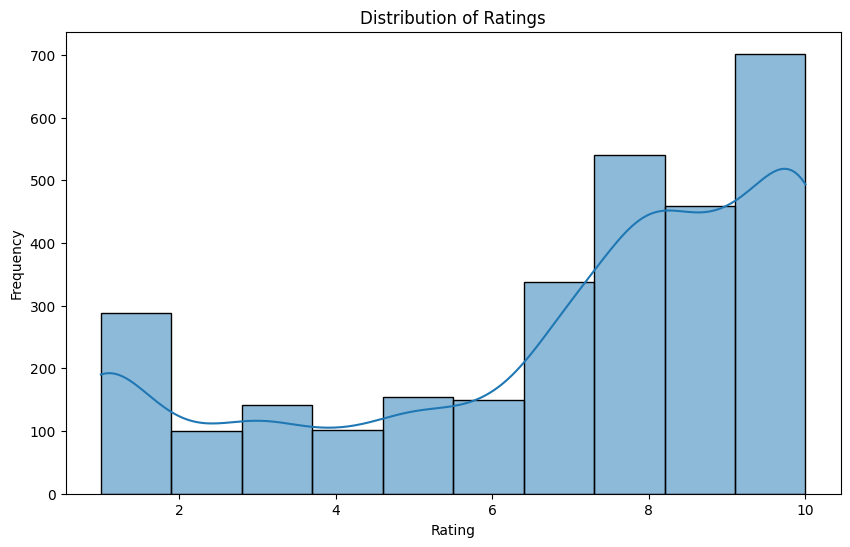

In [177]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

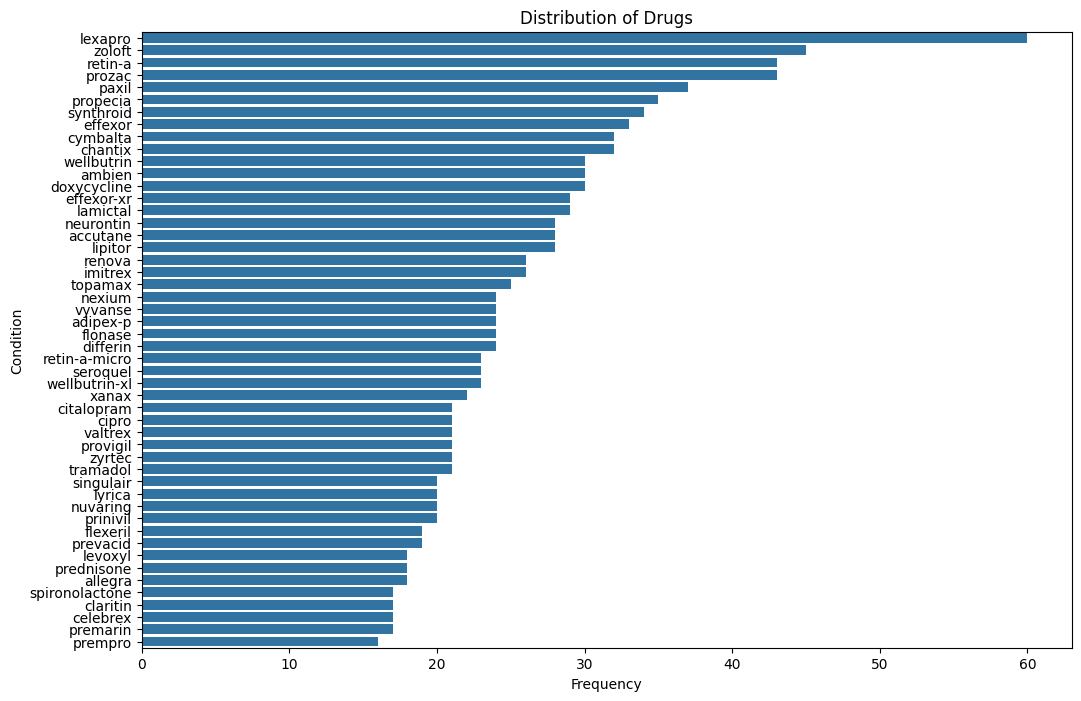

In [178]:
plt.figure(figsize=(12, 8))
sns.countplot(y='DrugName', data=df, order=df['DrugName'].value_counts().index[:50])
plt.title('Distribution of Drugs')
plt.xlabel('Frequency')
plt.ylabel('Condition')
plt.show()

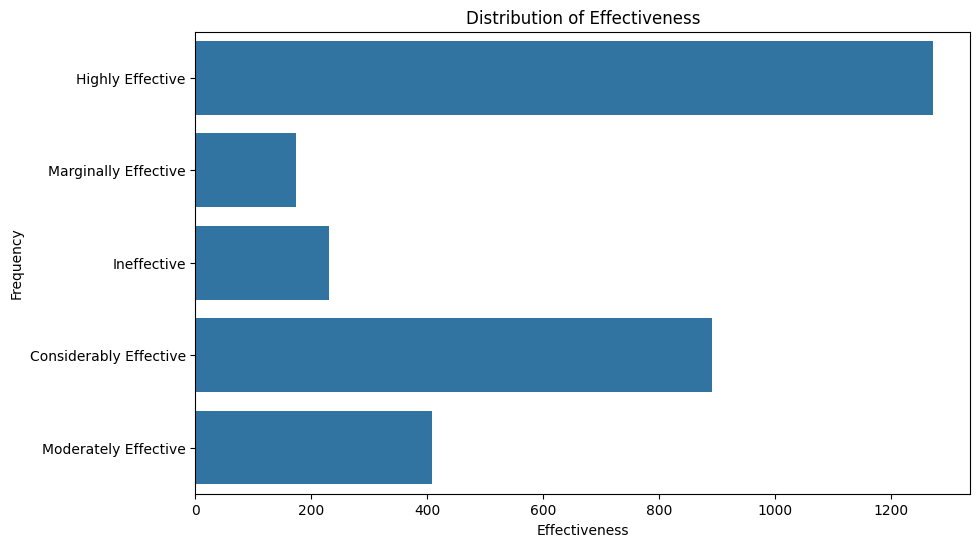

In [179]:
plt.figure(figsize=(10, 6))
sns.countplot(df['effectiveness'])
plt.title('Distribution of Effectiveness')
plt.xlabel('Effectiveness')
plt.ylabel('Frequency')
plt.show()

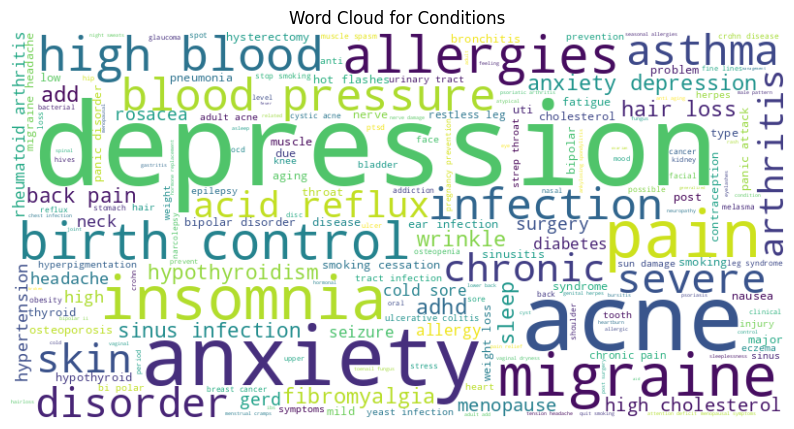

In [180]:
# Word cloud for Conditions
text = ' '.join(df['condition'].dropna().values)
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Conditions')
plt.show()

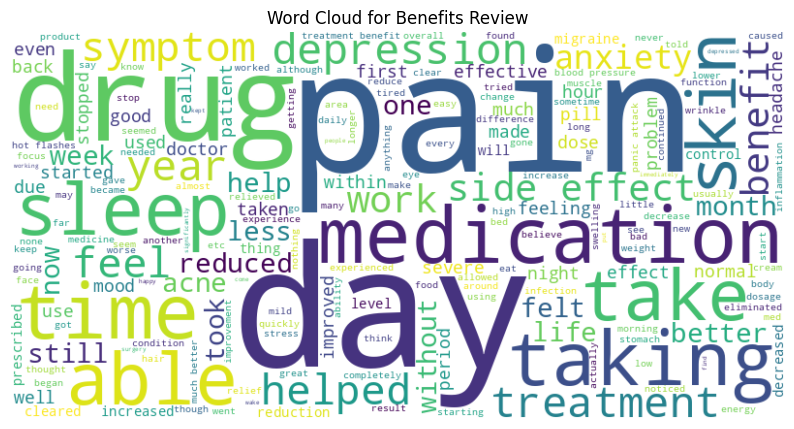

In [181]:
benefits_text = ' '.join(df['benefitsReview'].dropna().values)
benefits_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(benefits_text)

plt.figure(figsize=(10, 6))
plt.imshow(benefits_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Benefits Review')
plt.show()

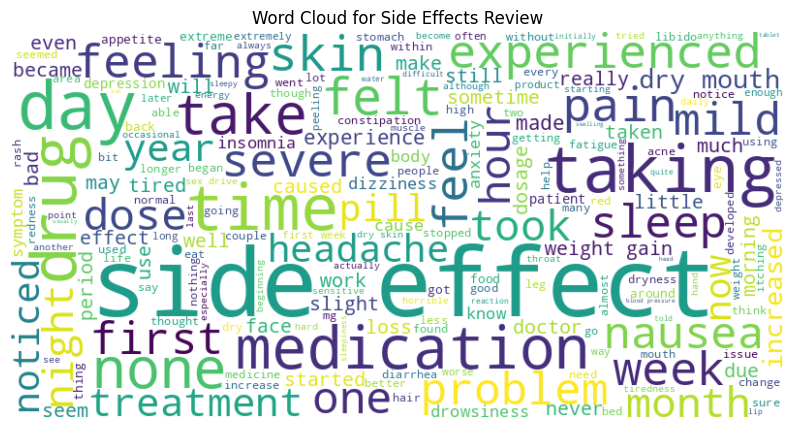

In [182]:
# Word cloud for side effects review
side_effects_text = ' '.join(df['sideEffectsReview'].dropna().values)
side_effects_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(side_effects_text)

plt.figure(figsize=(10, 6))
plt.imshow(side_effects_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Side Effects Review')
plt.show()

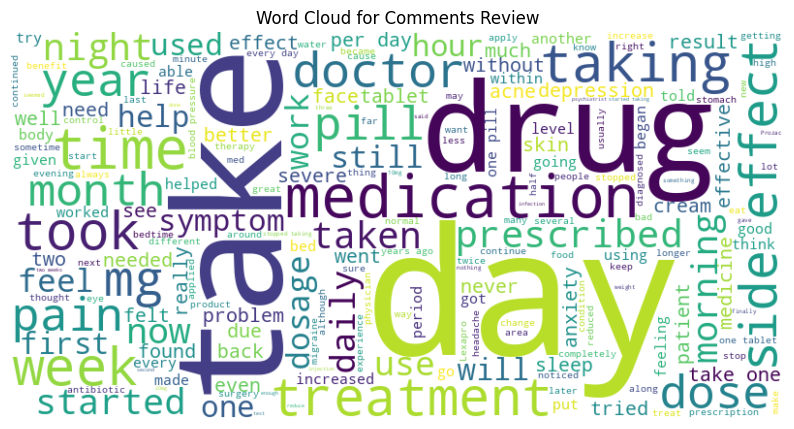

In [183]:
comments_text = ' '.join(df['comments'].dropna().values)
comments_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments_text)

plt.figure(figsize=(10, 6))
plt.imshow(comments_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Comments Review')
plt.show()

# Preprocessing -

In [184]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [185]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()]
    return ' '.join(tokens)

In [186]:
df['benefitsReview'] = df['benefitsReview'].apply(preprocess_text)
df['sideEffectsReview'] = df['sideEffectsReview'].apply(preprocess_text)
df['comments'] = df['comments'].apply(preprocess_text)
df['condition'] = df['condition'].apply(preprocess_text)

In [187]:
df.head()

,DrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,comments
0,enalapril,4,Highly Effective,Mild Side Effects,management congestive heart failure,slowed progression left ventricular dysfunctio...,cough hypotension proteinuria impotence renal ...,monitor blood pressure weight ass resolution f...
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,although type birth control con pro help cramp...,heavy cycle cramp hot flash fatigue long lasti...,hate birth control would suggest anyone
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramp,used cramp badly would leave balled bed least ...,heavier bleeding clotting normal,took pill onset menstrual cramp every hour too...
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,acid reflux went away month day drug heartburn...,constipation dry mouth mild dizziness would go...,given prilosec prescription dose per day medic...
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,think lyrica starting help pain sideeffects se...,felt extremely drugged dopey could drive med a...,see


In [188]:
categorical_columns = ['effectiveness', 'sideEffects']

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the categorical columns
encoded_features = ohe.fit_transform(df[categorical_columns])

# Convert the encoded features to a DataFrame
encoded_features_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_columns))

# Concatenate the encoded features with the original data
df_encoded = pd.concat([df.reset_index(drop=True), encoded_features_df.reset_index(drop=True)], axis=1)

# Drop the original categorical columns as they are now encoded
df_encoded.drop(columns=categorical_columns, inplace=True)

# Display the first few rows of the encoded data
df = df_encoded

In [212]:
# Combine text data
all_text = df['benefitsReview'] + ' ' + df['sideEffectsReview'] + ' ' + df['comments']+ ' ' + df['condition']

In [215]:
# Fit TF-IDF on all combined text data for training set
tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(all_text)

In [216]:
# Standardize numerical features for training set
scaler = StandardScaler()
df_encoded[['rating']] = scaler.fit_transform(df_encoded[['rating']])


In [223]:


# Combine TF-IDF features and numerical features
X = pd.concat([pd.DataFrame(tfidf_matrix.toarray()), df[['rating']].reset_index(drop=True)], axis=1)
X.columns = X.columns.astype(str)
y = df['DrugName']

# Train the k-NN model
model = NearestNeighbors(n_neighbors=3, algorithm='auto')
model.fit(X)

NearestNeighbors(n_neighbors=3)

In [224]:
def get_recommendations(input_data, model=model, tfidf=tfidf, scaler=scaler):
    # Preprocess the input text data
    input_data_processed = preprocess_text(input_data)

    # Transform the input text data using the fitted TF-IDF vectorizer
    input_data_tfidf = tfidf.transform([input_data_processed])

    # Assume a default rating (e.g., 0), adjust as needed
    default_rating = scaler.transform([[0]])  # Ensure the numerical feature is scaled

    # Combine input TF-IDF features with the default numerical feature
    input_combined = pd.concat([pd.DataFrame(input_data_tfidf.toarray()), pd.DataFrame(default_rating)], axis=1)

    # Get recommendations
    distances, indices = model.kneighbors(input_combined, n_neighbors=5)
    return df['DrugName'].iloc[indices[0]].unique()

In [225]:
get_recommendations('headache and nausea')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


array(['ecotrin', 'zomig', 'relpax', 'doryx', 'fiorinal'], dtype=object)

In [227]:
get_recommendations('itching')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


array(['zyrtec', 'niaspan', 'benadryl', 'triaz', 'percocet'], dtype=object)